In [1]:
!pip install comet_ml

  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19191 sha256=1af24601c1af3e7e99b0d2cc374a7d35ca501f5b8c23346e783fb7ead851af4d
  Stored in directory: c:\users\paby\appdata\local\pip\cache\wheels\b9\b1\68\cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=31815cdd8c97675f4d4f6ff9d6c0e0c440a7eecf268e4f814ebeadeabc5e4434
  Stored in directory: c:\users\paby\appdata\local\pip\cache\wheels\34\2a\24\a490264ae9041fd48f778ff393526572c80bb498ddecb07ea5
Successfully built nvidia-ml-py3 configobj


In [48]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="QTucqdVPpqdILbXpZnSCKY6vP",
    project_name="unsupervised-classification-predict",
    workspace="euphrasiam",
)

In [2]:
import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import urllib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
def get_data(filename):
	data = pd.read_csv(filename)

	return data

# Load your raw data
tweets = get_data("train.csv")
test_data = get_data("test_with_no_labels.csv")
# Any results you write to the current directory are saved as output.

In [4]:
from IPython.display import (
    Markdown as md,
    Latex,
    HTML,
)
from tqdm.auto import tqdm

In [5]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

tweets.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
display(tweets.shape)

(15819, 3)

In [7]:
value_counts = tweets["sentiment"].value_counts()
value_counts.name = "Raw Number"

value_normd = tweets["sentiment"].value_counts(normalize=True)
value_normd.name = "Percentage"

display(pd.concat([value_counts, value_normd], axis=1))

,Raw Number,Percentage
1,8530,0.539225
2,3640,0.230103
0,2353,0.148745
-1,1296,0.081927


In [8]:
#view datatype
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [9]:
from copy import deepcopy
eda = deepcopy(tweets)

In [10]:
sentiment_num2name = {
    -1: "Anti",
     0: "Neutral",
     1: "Pro",
     2: "News",
}
eda["sentiment"] = eda["sentiment"].apply(lambda num: sentiment_num2name[num])
eda.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [11]:
from matplotlib import pyplot as plt
from matplotlib import style

import seaborn as sns

sns.set(font_scale=1.5)
style.use("seaborn-poster")

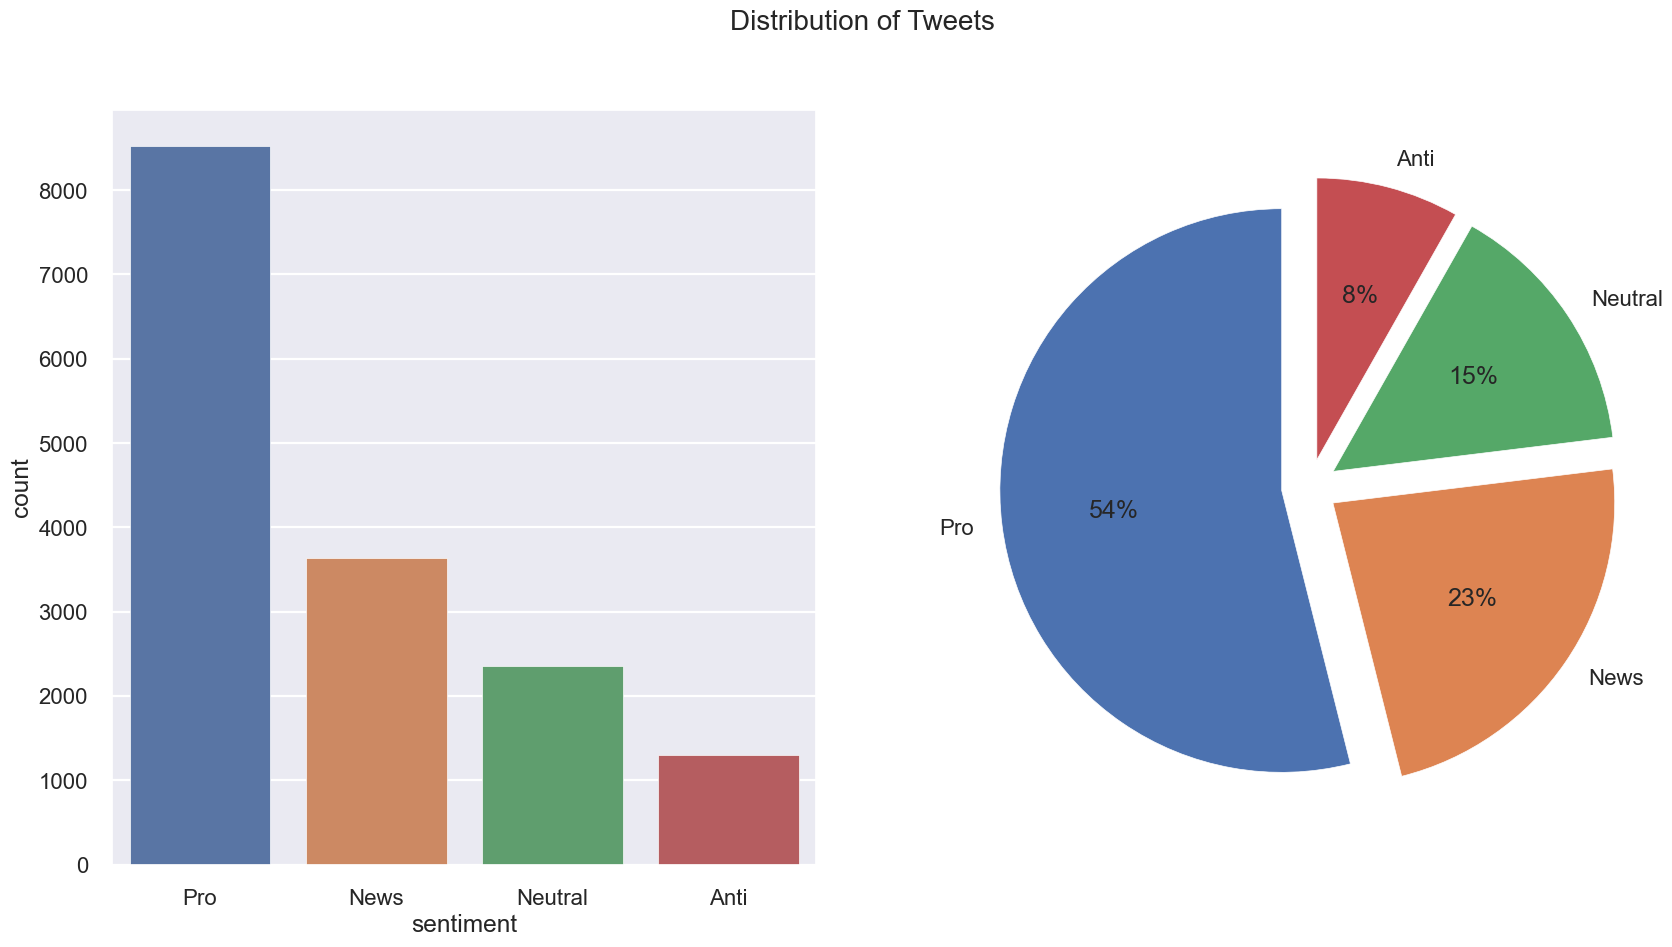

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), dpi=100)

sns.countplot(eda["sentiment"], ax=axes[0])

axes[1].pie(eda["sentiment"].value_counts(),
            labels=['Pro', 'News', 'Neutral', 'Anti' ],
            autopct="%1.0f%%",
            startangle=90,
            explode=tuple([0.1] * len(labels)))

fig.suptitle("Distribution of Tweets", fontsize=20)
plt.show()

In [53]:
import re
import nltk
import itertools

In [16]:
top15 = {}

by_sentiment = eda.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    hashtags = group["message"].apply(lambda tweet: re.findall(r"#(\w+)", tweet))
    hashtags = itertools.chain(*hashtags)
    hashtags = [ht.lower() for ht in hashtags]
    
    frequency = nltk.FreqDist(hashtags)
    
    df_hashtags = pd.DataFrame({
        "hashtags": list(frequency.keys()),
        "counts": list(frequency.values()),
    })
    top15_htags = df_hashtags.nlargest(15, columns=["counts"])
    
    top15[sentiment] = top15_htags.reset_index(drop=True)

display(pd.concat(top15, axis=1).head(n=10))

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(eda["message"] = eda["message"].apply(cleaner)
eda.head()28, 20))
counter = 0

for sentiment, top in top15.items():
    sns.barplot(data=top, y="hashtags", x="counts", palette="Blues_d", ax=axes[counter // 2, counter % 2])
    axes[counter // 2, counter % 2].set_title(f"Most frequent Hashtags by {sentiment} (Visually)", fontsize=25)
    counter += 1
plt.show()

In [54]:
def cleaner(tweet):
    tweet = tweet.lower()
    
    to_del = [
        r"@[\w]*",  # strip account mentions
        r"http(s?):\/\/.*\/\w*",  # strip URLs
        r"#\w*",  # strip hashtags
        r"\d+",  # delete numeric values
        r"rt[\s]+",
        r"U+FFFD",  # remove the "character note present" diamond
    ]
    for key in to_del:
        tweet = re.sub(key, "", tweet)
    
    # strip punctuation and special characters
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", tweet)
    # strip excess white-space
    tweet = re.sub(r"\s\s+", " ", tweet)
    
    return tweet.lstrip(" ")

In [55]:
eda["message"] = eda["message"].apply(cleaner)
eda.head()

In [56]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  

In [57]:
def lemmatizer(df):
    df["length"] = df["message"].str.len()
    df["tokenized"] = df["message"].apply(word_tokenize)
    df["parts-of-speech"] = df["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    wnl = WordNetLemmatizer()
    df["parts-of-speech"] = df["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    df["lemmatized"] = df["parts-of-speech"].apply(
        lambda tokens: [wnl.lemmatize(word, tag) for word, tag in tokens]
    )
    df["lemmatized"] = df["lemmatized"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return df

In [58]:
eda = lemmatizer(eda)
eda.head()

In [24]:
plt.figure(figsize=(15, 15))
sns.boxplot(x="sentiment", y="length", data=eda, palette=("Blues_d"))
plt.title("Tweet Length Distribution for each Sentiment")
plt.show()

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
frequency = {}

by_sentiment = eda.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    cv = CountVectorizer(stop_words="english")
    words = cv.fit_transform(group["lemmatized"])
    
    n_words = words.sum(axis=0)
    word_freq = [(word, n_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    
    freq = pd.DataFrame(word_freq, columns=["word", "freq"])
    
    frequency[sentiment] = freq.head(n=25)

to_view = pd.concat(frequency, axis=1).head(n=25)
display(to_view)

In [27]:
words = {sentiment: " ".join(frequency[sentiment]["word"].values) for sentiment in sentiment_num2name.values()}

cmaps = {
    "Anti": ("Reds", 110),
    "Pro" : ("Greens", 73),
    "News": ("Blues", 0),
    "Neutral": ("Oranges", 10),
}

from wordcloud import WordCloud

wordclouds = {}
for sentiment, (cmap, rand) in tqdm(cmaps.items()):
    wordclouds[sentiment] = WordCloud(
        width=800, height=500, random_state=rand,
        max_font_size=110, background_color="white",
        colormap=cmap
    ).generate(words[sentiment])
    
fig, axes = plt.subplots(2, 2, figsize=(28, 20))
counter = 0

for sentiment, wordcloud in wordclouds.items():
    axes[counter // 2, counter % 2].imshow(wordcloud)
    axes[counter // 2, counter % 2].set_title(sentiment, fontsize=25)
    counter += 1
    
for ax in fig.axes:
    plt.sca(ax)
    plt.axis("off")

plt.show()

In [61]:
# Application of the function to clean the tweets
tweets['message'] = tweets['message'].apply(cleaner)
test_data['message'] = test_data['message'].apply(cleaner)

In [62]:
tweets = lemmatizer(tweets)
test_data = lemmatizer(test_data)

In [63]:
X = tweets['message']
y = tweets['sentiment']

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10)

In [65]:
# Packages for training models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import xgboost as xgb


from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

import time

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#linear SVC model
Lsvc=LinearSVC(random_state=42)
#fit the model
clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                               max_df=0.9,
                                               ngram_range=(1, 2))),
                     ('clf', Lsvc)])

        # Logging the Execution Time for each model
start_time = time.time()
clf_text.fit(X_train, y_train)
run_time = time.time()-start_time

Lsvc_pred = clf_text.predict(X_val)

In [43]:
#saving each metric to a dictionary for logging
F1_Macro=f1_score(y_val,Lsvc_pred,average='macro')
F1_Accuracy=f1_score(y_val, Lsvc_pred,average='micro')
F1_Weighted=f1_score(y_val,Lsvc_pred,average='weighted')
Execution_Time=run_time

In [45]:
#Creating dictionaries for the data you want to log
params={"Random state":42,
       "Model_type": "LinearSVC",
       }

metrics={"F1_Macro":F1_Macro,
"F1_Accuracy":F1_Accuracy,
"F1_Weighted":F1_Weighted,
"Execution_Time":Execution_Time
    
}

In [46]:
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [47]:
experiment.end()

In [66]:
lr=LogisticRegression(random_state=42,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1e5,
                                  max_iter=4000)
#fit the model
clf_lr = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                               max_df=0.9,
                                               ngram_range=(1, 2))),
                     ('clf', lr)])

        # Logging the Execution Time for each model
start_time = time.time()
clf_lr.fit(X_train, y_train)
run_time = time.time()-start_time

lr_pred = clf_lr.predict(X_val)

In [67]:
#saving each metric to a dictionary for logging
F1_Macro=f1_score(y_val,lr_pred,average='macro')
F1_Accuracy=f1_score(y_val, lr_pred,average='micro')
F1_Weighted=f1_score(y_val,lr_pred,average='weighted')
Execution_Time=run_time

In [69]:
#Creating dictionaries for the data you want to log
params={"Random state":42,
       "Model_type": "Logistic Regression",
       }

metrics={"F1_Macro":F1_Macro,
"F1_Accuracy":F1_Accuracy,
"F1_Weighted":F1_Weighted,
"Execution_Time":Execution_Time
    
}

In [70]:
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [71]:
experiment.end()

In [72]:
kn=KNeighborsClassifier(n_neighbors=5)
#fit the model
clf_kn = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                               max_df=0.9,
                                               ngram_range=(1, 2))),
                     ('clf', kn)])

# Logging the Execution Time for each model
start_time = time.time()
clf_kn.fit(X_train, y_train)
run_time = time.time()-start_time

kn_pred = clf_kn.predict(X_val)

In [73]:
#saving each metric to a dictionary for logging
F1_Macro=f1_score(y_val,kn_pred,average='macro')
F1_Accuracy=f1_score(y_val, kn_pred,average='micro')
F1_Weighted=f1_score(y_val,kn_pred,average='weighted')
Execution_Time=run_time

In [74]:
#Creating dictionaries for the data you want to log
params={"Random state":42,
       "Model_type": "K-Neighbours",
       }

metrics={"F1_Macro":F1_Macro,
"F1_Accuracy":F1_Accuracy,
"F1_Weighted":F1_Weighted,
"Execution_Time":Execution_Time
    
}

In [75]:
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [76]:
experiment.end()

In [ ]:
mnb=MultinomialNB()
#fit the model
clf_mnb = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                               max_df=0.9,
                                               ngram_range=(1, 2))),
                     ('clf', mnb)])

# Logging the Execution Time for each model
start_time = time.time()
clf_mnb.fit(X_train, y_train)
run_time = time.time()-start_time

mnb_pred = clf_mnb.predict(X_val)

In [ ]:
#saving each metric to a dictionary for logging
F1_Macro=f1_score(y_val,mnb_pred,average='macro')
F1_Accuracy=f1_score(y_val, mnb_pred,average='micro')
F1_Weighted=f1_score(y_val,mnb_pred,average='weighted')
Execution_Time=run_time

In [ ]:
#Creating dictionaries for the data you want to log
params={"Random state":"default",
       "Model_type": "Multinomial",
       }

metrics={"F1_Macro":F1_Macro,
"F1_Accuracy":F1_Accuracy,
"F1_Weighted":F1_Weighted,
"Execution_Time":Execution_Time
    
}

In [ ]:
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
experiment.end()

In [ ]:
sgd=SGDClassifier(loss='hinge',penalty='l2',
                             alpha=1e-3,
                             random_state=42,
                             max_iter=5,
                             tol=None)
#fit the model
clf_sdg = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                               max_df=0.9,
                                               ngram_range=(1, 2))),
                     ('clf', sdg)])

# Logging the Execution Time for each model
start_time = time.time()
clf_sdg.fit(X_train, y_train)
run_time = time.time()-start_time

sdg_pred = clf_sdg.predict(X_val)

In [ ]:
#saving each metric to a dictionary for logging
F1_Macro=f1_score(y_val,mnb_pred,average='macro')
F1_Accuracy=f1_score(y_val, mnb_pred,average='micro')
F1_Weighted=f1_score(y_val,mnb_pred,average='weighted')
Execution_Time=run_time

In [ ]:
#Creating dictionaries for the data you want to log
params={"Random state":"default",
       "Model_type": "Multinomial",
       }

metrics={"F1_Macro":F1_Macro,
"F1_Accuracy":F1_Accuracy,
"F1_Weighted":F1_Weighted,
"Execution_Time":Execution_Time
    
}

In [ ]:
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
experiment.end()

In [ ]:
cn=ComplementNB()
#fit the model
clf_sdg = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                               max_df=0.9,
                                               ngram_range=(1, 2))),
                     ('clf', sdg)])

# Logging the Execution Time for each model
start_time = time.time()
clf_sdg.fit(X_train, y_train)
run_time = time.time()-start_time

sdg_pred = clf_sdg.predict(X_val)

In [ ]:
#saving each metric to a dictionary for logging
F1_Macro=f1_score(y_val,mnb_pred,average='macro')
F1_Accuracy=f1_score(y_val, mnb_pred,average='micro')
F1_Weighted=f1_score(y_val,mnb_pred,average='weighted')
Execution_Time=run_time

In [ ]:
#Creating dictionaries for the data you want to log
params={"Random state":"default",
       "Model_type": "Multinomial",
       }

metrics={"F1_Macro":F1_Macro,
"F1_Accuracy":F1_Accuracy,
"F1_Weighted":F1_Weighted,
"Execution_Time":Execution_Time
    
}

In [ ]:
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
experiment.end()

In [ ]:

classifiers = [LinearSVC(random_state=42),
               LogisticRegression(random_state=42,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1e5,
                                  max_iter=4000),
               KNeighborsClassifier(n_neighbors=5),
               MultinomialNB(),
               ComplementNB(),
               SGDClassifier(loss='hinge',
                             penalty='l2',
                             alpha=1e-3,
                             random_state=42,
                             max_iter=5,
                             tol=None)
               ]

In [ ]:
def models_building(classifiers, X_train, y_train, X_val, y_val):
    """
    This function takes in a list of classifiers
    and both the train and validation sets
    and return a summary of F1-score and
    processing time as a dataframe

    Input:
    classifiers: a list of classifiers to train
                 datatype: list
    X_train: independent variable for training
             datatype: series
    y_train: dependent variable for training
             datatype: series
    X_val: independent variable for validation
           datatype: series
    y_val: dependent variable for validation
           datatype: series

    Output:
    model_summary: F1 Score for all the classifiers
                   datatype: dataframe
    """

    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                                       max_df=0.9,
                                                       ngram_range=(1, 2))),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)
        run_time = time.time()-start_time

        # Output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')

In [ ]:
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

import time

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

# Style
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')

In [ ]:
classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)
ordered_df = classifiers_df.sort_values('F1-Macro', ascending=False)
ordered_df

In [ ]:
# Refining the train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01)

In [ ]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

tuned_mnb = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(1, 2))),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

tuned_mnb.fit(X_train, y_train)  # Fitting the model

y_pred_mnb = tuned_mnb.predict(X_val)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_mnb))

In [ ]:
submission_df = pd.DataFrame(test_data['tweetid'])
submission_df['sentiment'] = tuned_mnb.predict(test_data['message'])
submission_df.to_csv('submission4.csv', index=False)